### 신입교육세션 회귀분석 실습과 과제
1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/Users/zzzzzioni/Downloads'

In [4]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                         00:30:31   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [15]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                         00:30:35   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.06

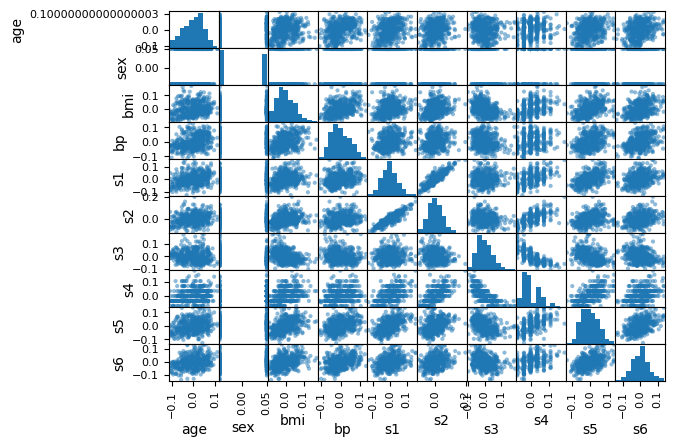

In [16]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

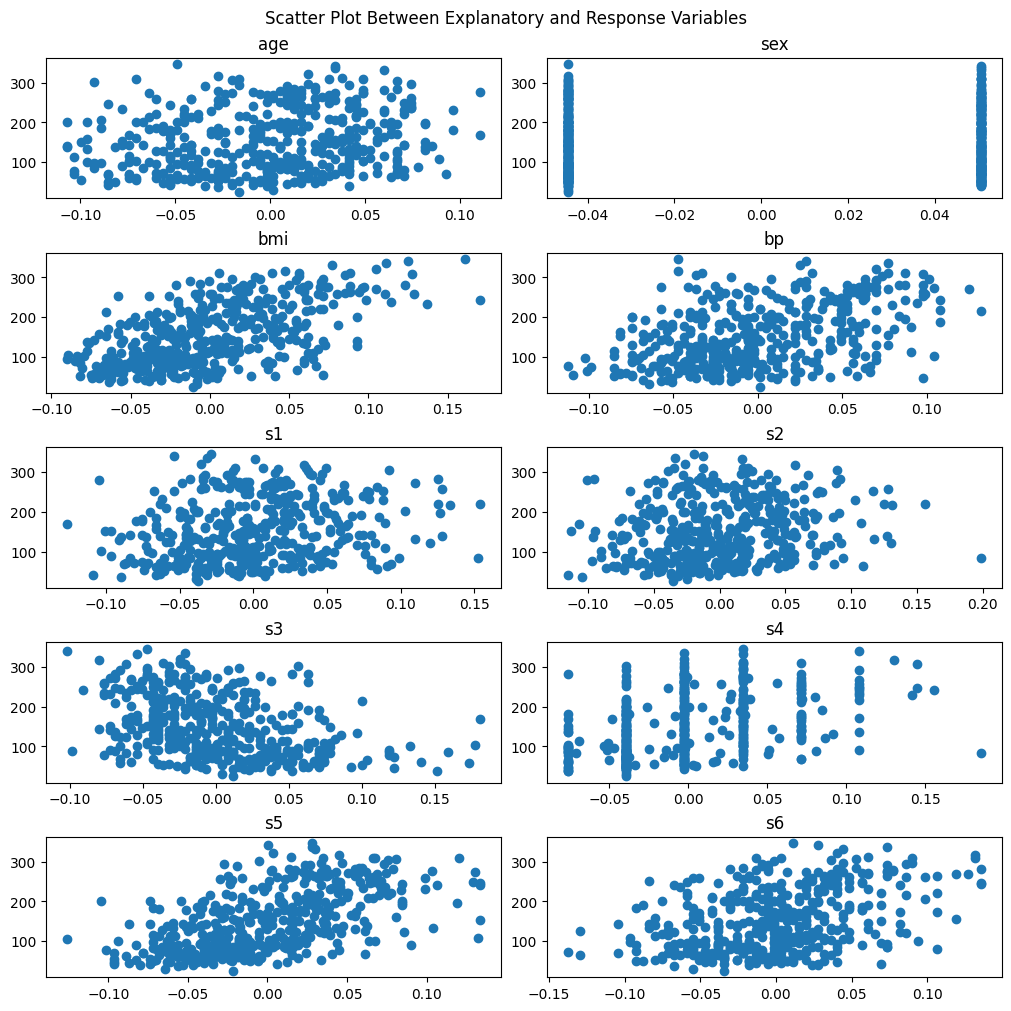

In [17]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

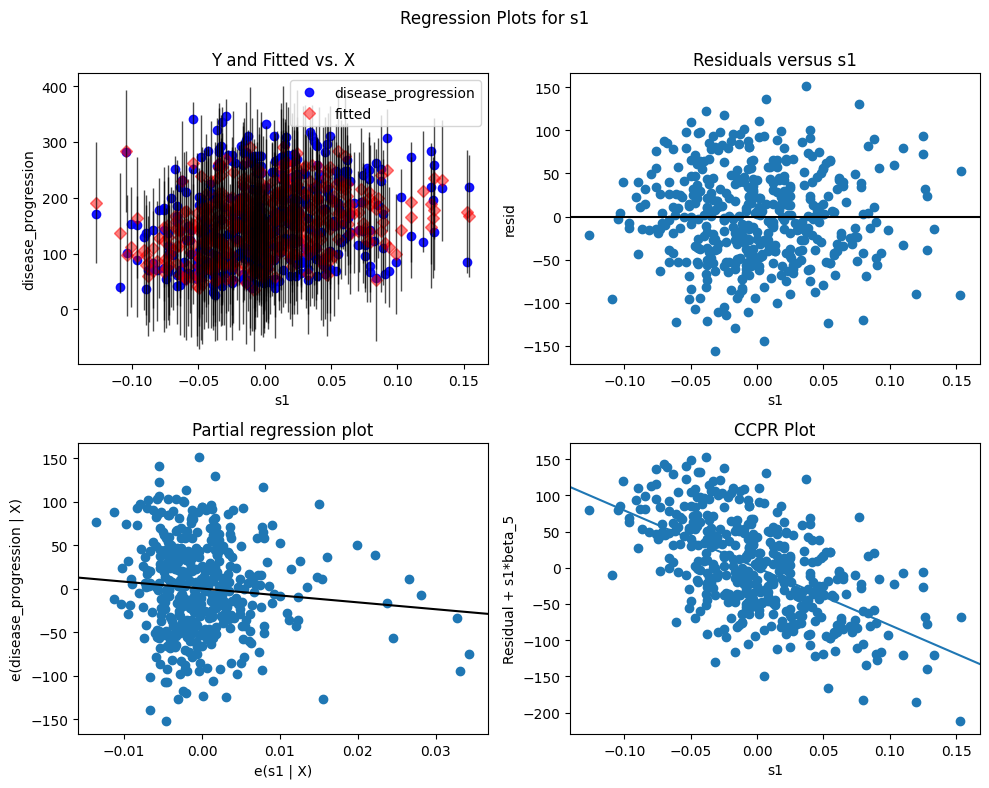

In [18]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

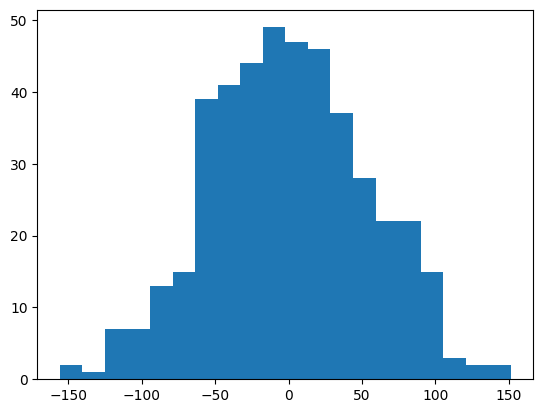

In [19]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [20]:
# 데이터 불러오기
data = pd.read_csv('Student_Performance.csv', index_col = 0)
data.head()

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [21]:
form_mod = ols('PI ~ Study_Hours + Prev_Scores + Sleep_Hours + Sample_Practice + Extracurriculars', data = data)
res = form_mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:35:22   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [22]:
Y = data.iloc[:, -2]
X = data.iloc[:, 0]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:36:45   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

(2.1)은 다중 회귀 분석으로 Intercept가 -34.0756이고, 설명변수 Study_Hours의 회귀계수, 즉 기울기가 2.8530이다. 

반면, (2.2)는 단순 선형 회귀 분석으로 Intercept가 41.3792이고, 설명변수 Study_Hours의 회귀계수가 2.7731이다. 

설명변수 Study_Hours의 다중 회귀 분석과 단순 선형 회귀 분석 하의 회귀계수가 거의 비슷하기 때문에, Study_Hours와 다른 설명변수들 간의 다중공산성은 거의 존재하지 않는다고 추측할 수 있다. 

그리고 설명변수 Study_Hours의 회귀 계수인 약 2.8은 나머지 설명변수들이 고정되었을 때, Study_Hours가 1단위 변화할 때 종속변수인 PI가 2.8만큼 변화함을 의미한다. 

즉, 설명변수 Study_Hours와 종속변수 PI는 양의 선형 상관관계를 가진다고도 이야기할 수 있다.

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

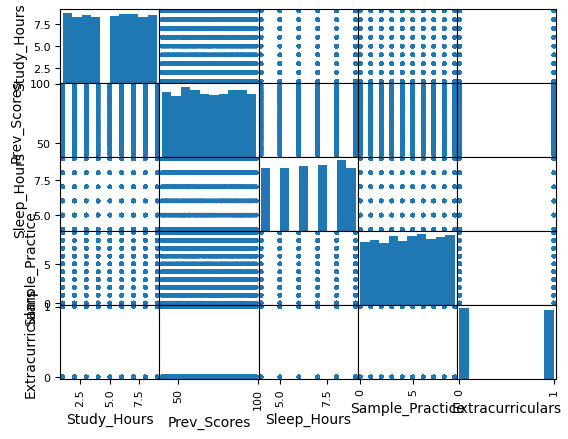

In [77]:
# 산점도 행렬 그리기 - 다중공선성 확인

X_ = data.iloc[:, [0,1,2,3,5]]
pd.plotting.scatter_matrix(X_)
plt.show()

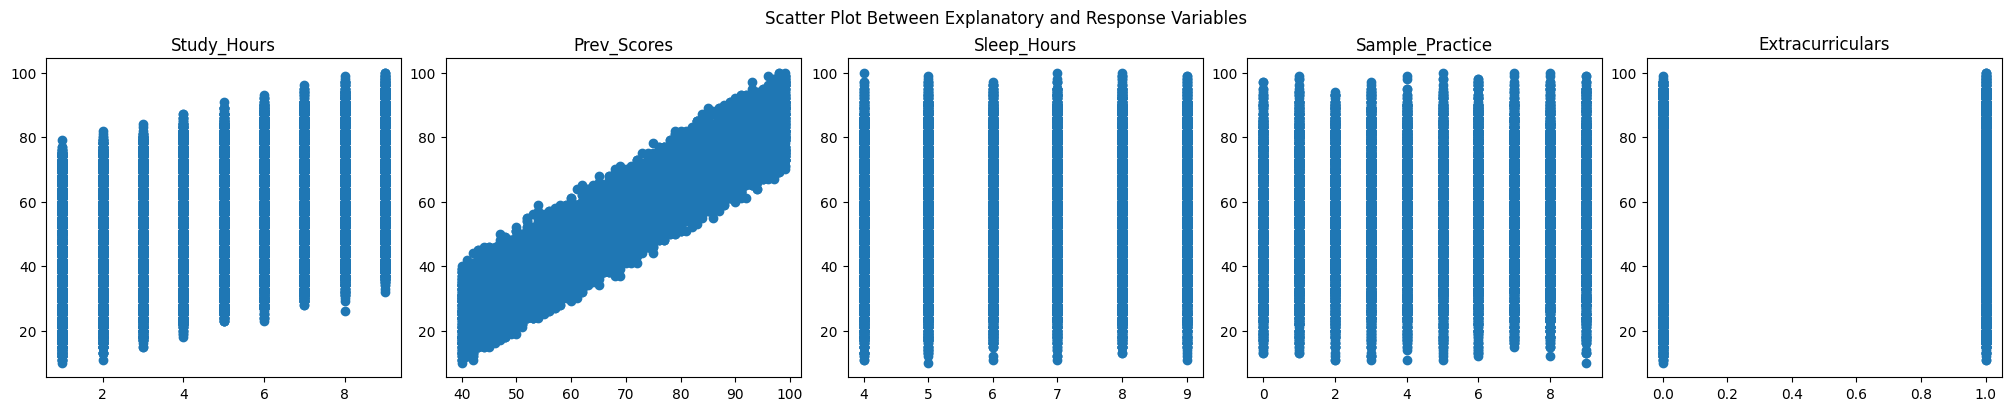

In [65]:
# 설명변수와 종속변수 간의 산점도 -> 선형성 확인

def draw_scatter(ii, title):
    X_cols = list(X_.columns)
    fig, axs = plt.subplots(1, ii, figsize = (20, 4), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [i for i in range(0,ii)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5,  "Scatter Plot Between Explanatory and Response Variables")

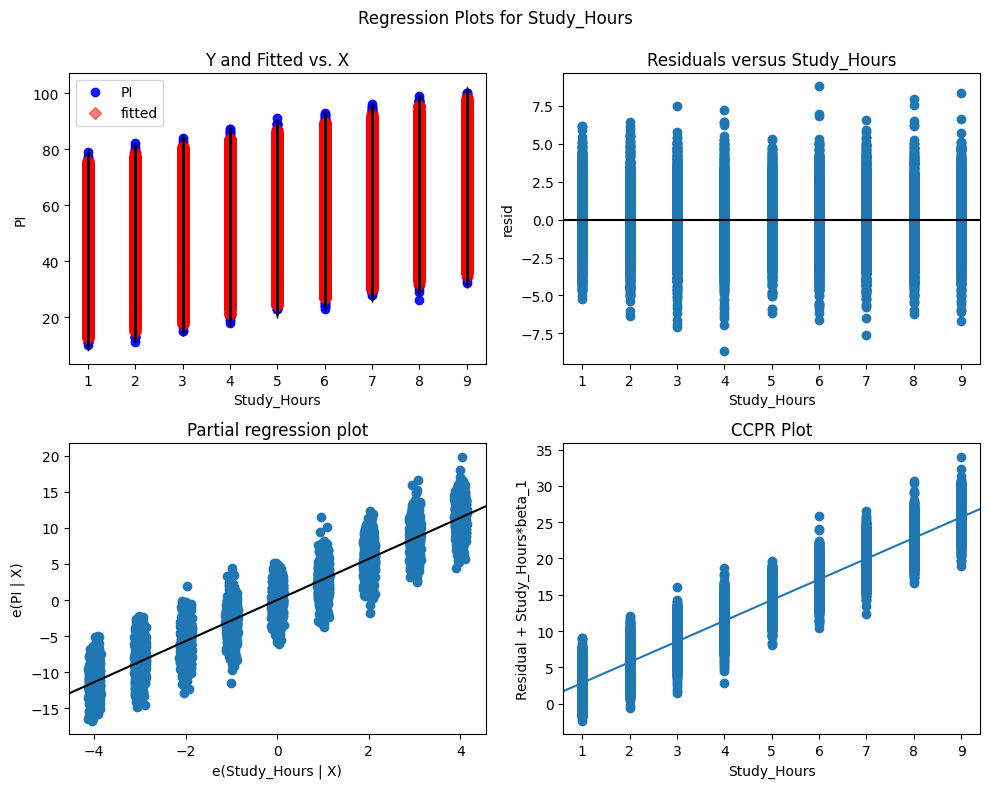

In [69]:
# 'Study_Hours'의 잔차도 + 다른 여러 그림 그리기

fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 'Study_Hours', fig=fig)

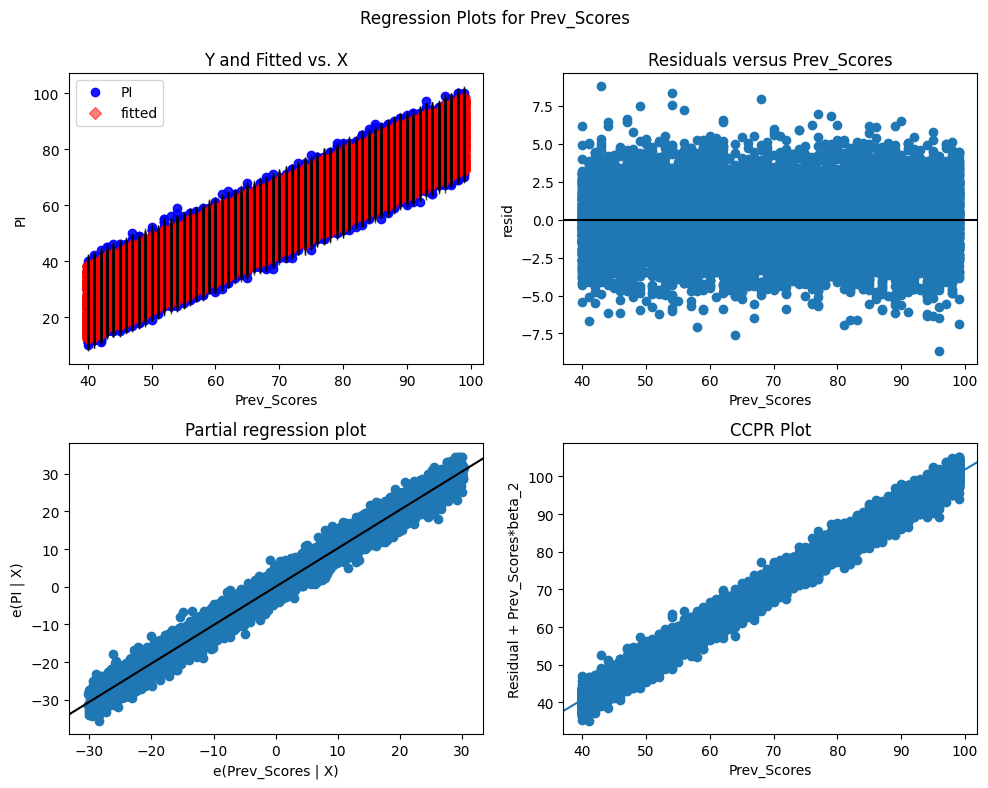

In [54]:
# 'Prev_Scores'의 잔차도 + 다른 여러 그림 그리기

fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 'Prev_Scores', fig=fig)

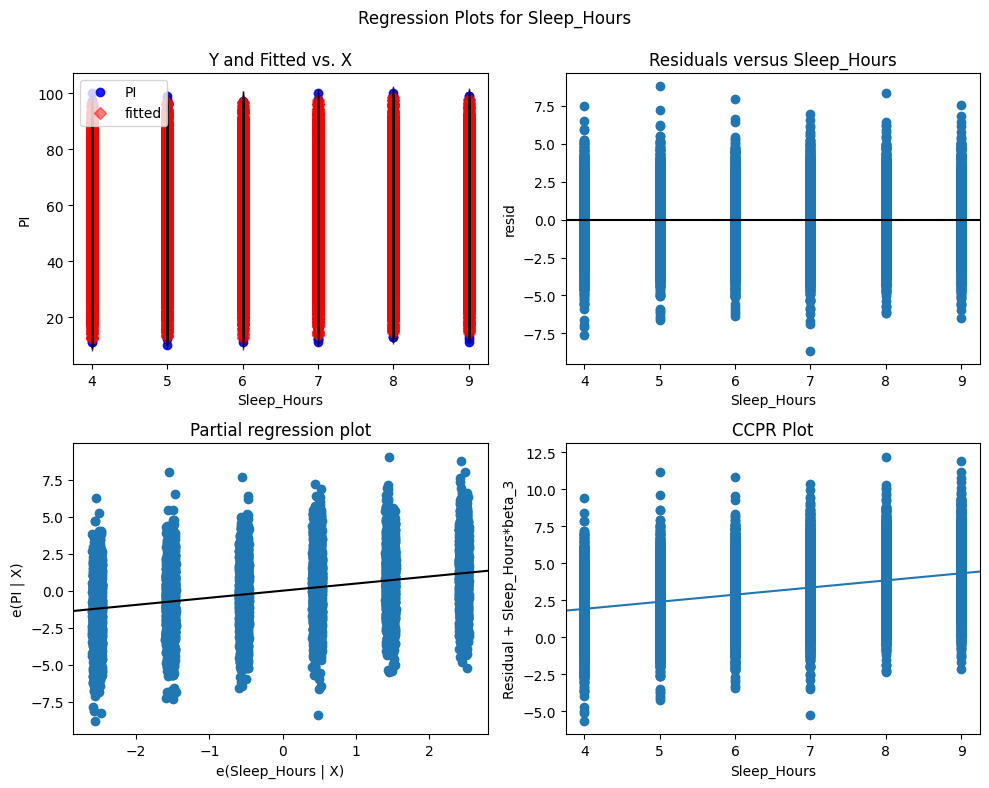

In [55]:
# 'Sleep_Hours'의 잔차도 + 다른 여러 그림 그리기

fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 'Sleep_Hours', fig=fig)

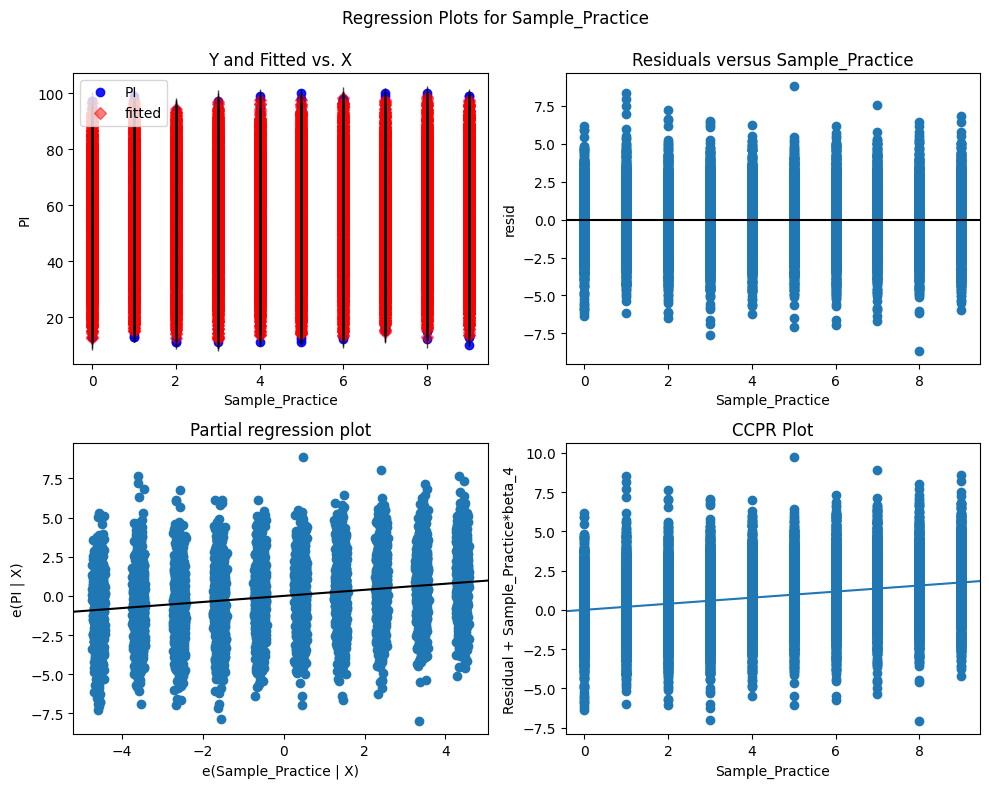

In [56]:
# 'Sample_Practice'의 잔차도 + 다른 여러 그림 그리기

fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 'Sample_Practice', fig=fig)

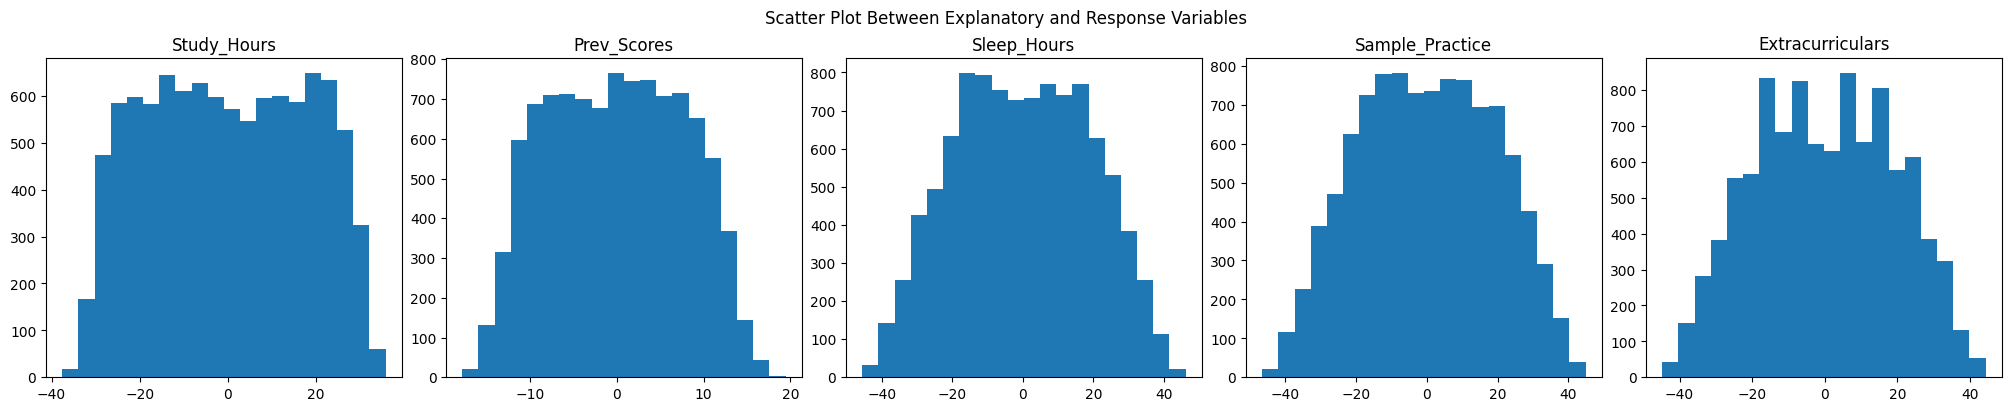

In [86]:
# 설명 변수들의 잔차 히스토그램

def draw_residual_hist(ii, title):
    X_cols = list(X_.columns)
    fig, axs = plt.subplots(1, ii, figsize = (20, 4), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [i for i in range(0,ii)]
    for i in range(ii):
        X = X_.iloc[:, i]
        X = sm.add_constant(X)
        model = sm.OLS(Y, X)
        res = model.fit()
        axs[i].set_title(X_cols[i])
        residuals = Y - res.predict()
        axs[i].hist(residuals, bins = 20)
    plt.show()

draw_residual_hist(5,  "Residual Plots of Response Variables")



산점도 행렬과 설명변수와 종속변수의 사이의 산점도를 보면 Prev_Scores를 제외한 나머지 설명변수들이 범주형처럼 기능하는 것을 볼 수 있다. 

먼저 산점도 행렬을 볼 때 다중공산성은 전혀 없는 것으로 파악된다.

다음으로 설명변수와 종속변수 간의 산점도를 참고할 때, 대략 Study_Hours과 Prev_Scores만이 종속변수 PI와 선형성(Linearity)이 존재하는 것으로 보인다. 즉, 나머지 Sleep_Hours, Sample_Practice, Extracurriculars 변수들은 뚜렷한 선형성을 볼 수 없다.

설명변수 별로 plot_regress_exog을 활용하여 잔차도를 출력해본 결과, 모든 설명 변수들의 잔차가 0을 기준으로 고르게 분포해있고, 어떠한 패턴이나 상관성이 나타나지 않는다. 따라서 모든 설명 변수는 등분산성(Homoscedasticity)와 독립성(Independence)를 만족한다고 볼 수 있다.

설명변수들의 잔차 히스토그램을 출력해본 결과, 분산이 변수 별로 차이가 나긴 하지만 대부분 평균이 0인 종모양의 분포를 대략적으로 따르는 것을 확인할 수 있다. 따라서 모든 설명변수들은 어느정도 정규성(Normality)을 따른다고 말할 수 있다.